## Load data

In [4]:
import numpy as np
from keras.utils.np_utils import to_categorical
from keras.models import load_model

from rupunktor.utils import confusion_matrix, show_statistics, print_confusion_matrix

def pretty_show(name, y_true, y_pred):
    print('"{}" stats'.format(name))
    print_confusion_matrix(confusion_matrix(y_true, y_pred, normalize=True), 'space comma period'.split(), figsize=(7, 5))
    show_statistics(confusion_matrix(y_true, y_pred))

In [3]:
data = np.load('runews_data/data.npy')

# Convert to recurrent network format
x_all = data[:, 0, :]
y_all = data[:, 1, :]
y_all = to_categorical(y_all)

# Dev data (TODO: use another, totally unseen data)
x_dev = x_all[-100000:]
y_dev = y_all[-100000:]

## Check model statistics

### Bidirectional GRU with morphological tags, 128 hidden units

/home/valdemar/Development/Projects/master-thesis-dev/ml3/lib/python3.5/site-packages/keras/layers/core.py:642: UserWarning: `output_shape` argument not specified for layer lambda_2 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, None, 3)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


"augmented_gru_128" stats
Sign             Precision Recall    F-Score  
----------------------------------------------
<space>          97.168    98.417    97.789   
<comma>          85.588    75.918    80.463   
<period>         79.860    77.377    78.599   
----------------------------------------------
Overall          82.738    76.611    79.557   


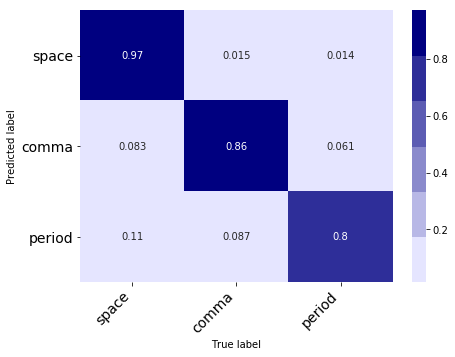

In [5]:
d = np.load('news_data/data.npy')[-100000:]

y = to_categorical(d[:, 1, :])
y = y[:, :-1, :]

x1 = d[:, 0, :]
x2 = np.load('news_data/morph_tags.npy')[-100000:]

model = load_model('bundles/augmented_128/model.hdf5')
pretty_show('augmented_gru_128', y, model.predict([x1, x2]))

### Baseline all zeros

"Zero baseline" stats
Sign             Precision Recall    F-Score  
----------------------------------------------
<space>          84.356    100.000   91.514   
<comma>          nan       0.000     nan      
<period>         nan       0.000     nan      
----------------------------------------------
Overall          nan       0.000     nan      


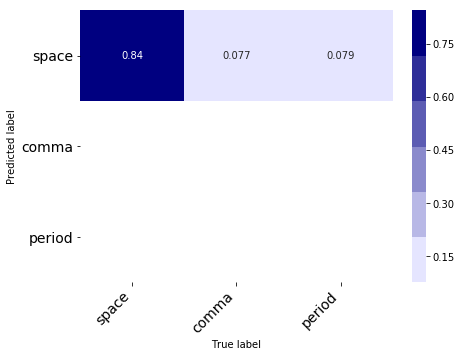

In [4]:
# Baseline check, model predicting all zeros
y_baseline = np.zeros(y_all.shape)
y_baseline[..., 0] = 1
pretty_show('Zero baseline', y_all, y_baseline)

### Truth model

"Ground truth" stats
Sign             Precision Recall    F-Score  
----------------------------------------------
<space>          100.000   100.000   100.000  
<comma>          100.000   100.000   100.000  
<period>         100.000   100.000   100.000  
----------------------------------------------
Overall          100.000   100.000   100.000  


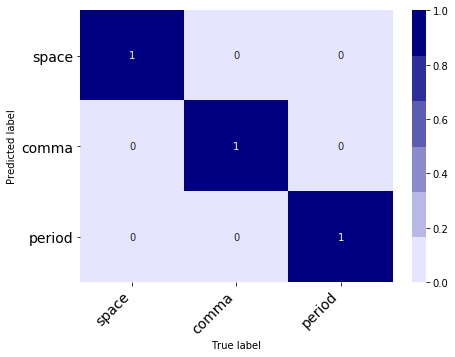

In [5]:
pretty_show('Ground truth', y_dev, y_dev)

### Bidirectional GRU network without embedding, 128 hidden units

In [11]:
%%time
m_bgru = load_model('models/bgru_128.hdf5')
m_bgru.summary()
pretty_show('bgru_128', y_dev, m_bgru.predict(x_dev))

"bgru_128" stats
Sign             Precision Recall    F-Score  
----------------------------------------------
<space>          88.333    98.798    93.273   
<comma>          74.436    29.831    42.593   
<period>         58.247    17.601    27.033   
----------------------------------------------
Overall          67.661    23.858    35.277   
CPU times: user 2min 10s, sys: 37.7 s, total: 2min 47s
Wall time: 2min 47s


### Bidirectional GRU with embedding layer, 128 hidden units
Best model so far

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         6400256   
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 256)         197376    
_________________________________________________________________
dense_1 (Dense)              (None, None, 3)           771       
Total params: 6,598,403
Trainable params: 6,598,403
Non-trainable params: 0
_________________________________________________________________
"emb_bgru_128" stats
Sign             Precision Recall    F-Score  
----------------------------------------------
<space>          96.617    98.167    97.386   
<comma>          84.278    71.145    77.157   
<period>         78.602    77.325    77.958   
----------------------------------------------
Overall          81.289    74.163    77.563   
CPU times: user 1min 43s, sys: 22.8 s, total: 

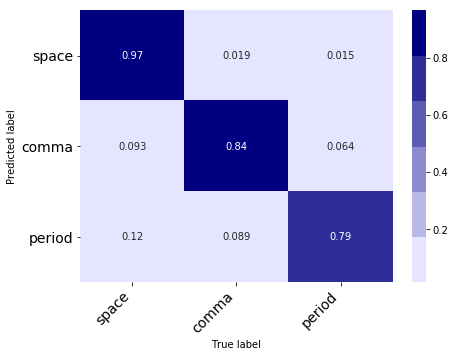

In [17]:
%%time
m_ebgru = load_model('models/emb_bgru_128.hdf5')
m_ebgru.summary()
pretty_show('emb_bgru_128', y_dev, m_ebgru.predict(x_dev.reshape(x_dev.shape[0], -1)))

### Bidirectional GRU with embedding layer, 196 hidden units

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 196)         9800392   
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 392)         462168    
_________________________________________________________________
dense_1 (Dense)              (None, None, 3)           1179      
Total params: 10,263,739
Trainable params: 10,263,739
Non-trainable params: 0
_________________________________________________________________
"emb_bgru_196" stats
Sign             Precision Recall    F-Score  
----------------------------------------------
<space>          96.421    98.313    97.358   
<comma>          83.484    71.447    76.998   
<period>         80.307    74.804    77.458   
----------------------------------------------
Overall          81.865    73.087    77.227   
CPU times: user 3min 2s, sys: 1min 16s, tota

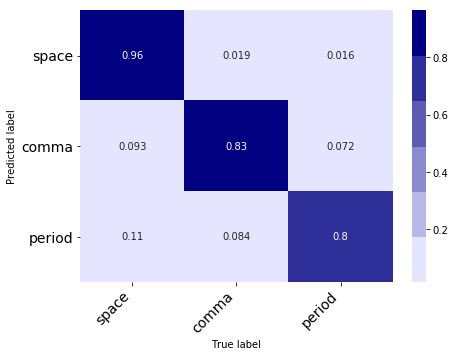

In [5]:
%%time
def _show():
    m = load_model('models/emb_bgru_196.hdf5')
    m.summary()
    pretty_show('emb_bgru_196', y_dev, m.predict(x_dev.reshape(x_dev.shape[0], -1)))
_show()

### Bidirectional GRU with embedding layer and Dropout, 128 hidden units

In [11]:
%%time
m_drop_ebgru = load_model('models/drop_emb_bgru_128.hdf5')
m_drop_ebgru.summary()
pretty_show('drop_emb_bgru_128', y_dev, m_drop_ebgru.predict(x_dev.reshape(x_dev.shape[0], -1)))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         6400256   
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 256)         263168    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 256)         0         
_________________________________________________________________
dense_1 (Dense)              (None, None, 3)           771       
Total params: 6,664,195
Trainable params: 6,664,195
Non-trainable params: 0
_________________________________________________________________
"drop_emb_bgru_128" stats
Sign             Precision Recall    F-Score  
----------------------------------------------
<space>          96.010    98.260    97.122   
<comma>          85.043    67.333    75.159   
<period>         77.558    74.138    75.809   
---

## Some testing cells

In [4]:
from train_model import _create_model, COMPILE_OPTS
test_model = _create_model()
test_model.compile(**COMPILE_OPTS)

/home/valdemar/Development/Projects/master-thesis-dev/ml3/lib/python3.5/site-packages/keras/layers/core.py:642: UserWarning: `output_shape` argument not specified for layer lambda_2 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, None, 3)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
word_input (InputLayer)         (None, None)         0                                            
__________________________________________________________________________________________________
pos_tags_input (InputLayer)     (None, None)         0                                            
__________________________________________________________________________________________________
word_index_embedding (Embedding (None, None, 64)     3200128     word_input[0][0]                 
__________________________________________________________________________________________________
pos_tags_embedding (Embedding)  (None, None, 64)     44928       pos_tags_input[0][0]             
__________________________________________________________________________________________________
concatenat

In [6]:
# test_model = load_model('models/emb_bgru_128.hdf5')

# test_model.load_weights('weights/cut_augmented_gru_128.w.09-0.95195.hdf5')

# test_model.save('bundles/augmented_128/model.hdf5')

In [7]:
x_stem = np.load('runews_data/stem_x.npy')[-100000:]
x_tags = np.load('runews_data/morph_tags.npy')[-100000:]

In [9]:
y_pred = test_model.predict([x_stem, x_tags])

"TestModel" stats
Sign             Precision Recall    F-Score  
----------------------------------------------
<space>          95.880    98.175    97.014   
<comma>          84.872    69.289    76.293   
<period>         76.156    70.406    73.168   
----------------------------------------------
Overall          80.345    69.835    74.722   


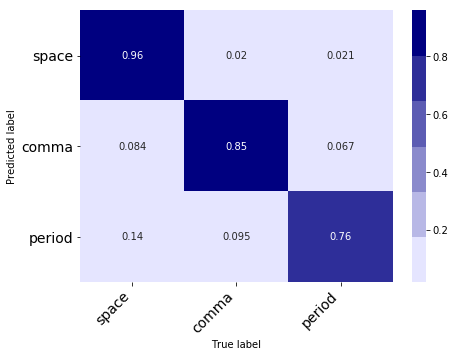

In [10]:
pretty_show('TestModel', y_dev, y_pred)

"TestModel2" stats
Sign             Precision Recall    F-Score  
----------------------------------------------
<space>          96.421    98.313    97.358   
<comma>          83.484    71.447    76.998   
<period>         80.307    74.804    77.458   
----------------------------------------------
Overall          81.865    73.087    77.227   


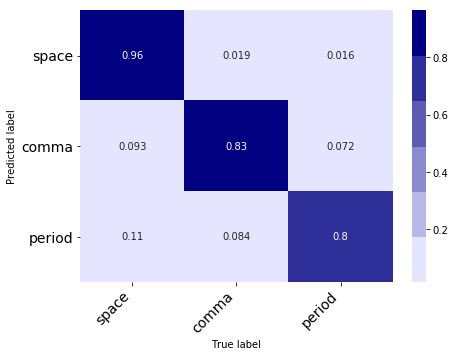

In [16]:
pretty_show('TestModel2', y_dev, y_pred)